In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications.vgg19 import preprocess_input
# InceptionResNetV2
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3

#from keras.applications.inception_resnet_v2 import preprocess_input
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2


from tensorflow.keras.layers import Input

import numpy as np

import matplotlib.pyplot as plt

import os
#Load Images from a folder and convert to an array
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        #img = load_img(os.path.join(folder,filename),  target_size=(224, 224)) 
        img = load_img(os.path.join(folder,filename),  target_size=(299, 299)) 
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)
        img = preprocess_input(img)
        img.flatten()
        if img is not None:
            images.append(img)
    return images

from keras.applications.vgg19 import VGG19
#Cosine similarity: https://medium.com/@salmariazi/computing-image-similarity-with-pre-trained-keras-models-3959d3b94eca
from keras import models, Model

#Create a VGG model and save to specified path
def create_model(save_filepath):
    # loading vgg16 model and using all the layers until the 2 to the    last to use all the learned cnn layers
    #ssl._create_default_https_context = ssl._create_unverified_context
    
    #vgg = VGG19(include_top=True)
    #model2 = Model(vgg.input, vgg.layers[-2].output)
    #model2.save(save_filepath) # saving the model just in case
    
    #input_tensor = Input(shape=(224, 224, 3))
    input_tensor = Input(shape=(299, 299, 3))
    base_model = InceptionV3(input_tensor=input_tensor,weights='imagenet', include_top=True)
    #model2 = Model(base_model.input, base_model.layers[-2].output)
    base_model.save(save_filepath) # saving the model just in case
    
    #input_tensor = Input(shape=(224, 224, 3))
    #input_tensor = Input(shape=(168, 168, 3))
   # base_model = InceptionResNetV2(input_tensor=input_tensor,weights='imagenet', include_top=False) #Include Top can only be true if 299x299
    #model2 = Model(base_model.input, base_model.layers[-2].output)
  #  base_model.save(save_filepath) # saving the model just in case
    return base_model

#Load a model from specified path
def load_model_from_path(save_filepath):
    # loading the model from the saved path
    model = models.load_model(save_filepath)
    #model = load_model(save_filepath)
    return model

#def get_preds(all_imgs_arr,model):
    # getting the extracted features - final shape (number_of_images, 4096)
    #preds = model.predict(all_imgs_arr)
    #return preds

#get predictions (of object?) and return as array
def get_preds(all_imgs_arr):
    #preds_all = np.zeros((len(all_imgs_arr),4096))
    #preds_all = np.zeros((len(all_imgs_arr),1536))
    preds_all = np.zeros((len(all_imgs_arr),1000))
    for j in range(np.array(all_imgs_arr).shape[0]):
        preds_all[j] = model.predict(all_imgs_arr[j])
        
    return preds_all

#Get features
def get_features(all_imgs_arr,model2):
    #model2 = VGG19(weights='imagenet', include_top=False)
    
    featurelist = []
    for i in range(np.array(all_imgs_arr).shape[0]):
        #img_data = img_to_array(all_imgs_arr[i])
        #img_data = np.expand_dims(all_imgs_arr[i], axis=0)
        #img_data = preprocess_input(all_imgs_arr[i])
        img_data = all_imgs_arr[i]
        features = np.array(model2.predict(img_data))
        featurelist.append(features.flatten())
    return featurelist

#K = Numer of images to take into account, Master Image is the vector to check similarity with, preds are predictions
def get_nearest_neighbor_and_similarity(preds, K,MasterImage,saveFile):

    #dims = 4096
    #dims = 25088
    dims = 1000
    #dims = 3
    n_nearest_neighbors = K+1
    trees = 10000
    file_index_to_file_vector = {}
    
    # build ann index (Aproximate Nearest Neighbours)
    t = AnnoyIndex(dims)
    #for i in range(preds.shape[0]):
    i=0
    j=0
    for l in preds:
        
        file_vector = preds[i]
        file_index_to_file_vector[i] = file_vector
        t.add_item(i, file_vector)
        i+=1
    t.build(trees)
    t.save('D:/Users/SCA/'+saveFile)
    
    #for i in range(preds.shape[0]):
    for o in preds:
        master_vector = file_index_to_file_vector[j]
        #Here we assign master vector, SHOULD be one K
    
        named_nearest_neighbors = []
        similarities = []
        nearest_neighbors = t.get_nns_by_item(j, n_nearest_neighbors)
        j+=1

    #Next we print all the neighbours on one axis, should redo new master and nearest for the second axis to plot
    for j in nearest_neighbors:
#         print (j)
        neighbor_vector = preds[j]
    #The distance between objects,/ similarity, cosine for vinkel
        #similarity = 1 - spatial.distance.cosine(master_vector, neighbor_vector)
        similarity = 1 - spatial.distance.cosine(MasterImage, neighbor_vector)
        rounded_similarity = int((similarity * 10000)) / 10000.0
        similarities.append(rounded_similarity)
    return similarities, nearest_neighbors

        
#NOT CURRENTLY WORKING (Supposed to show similar images)        
def get_similar_images(similarities, nearest_neighbors, images1):
    j = 0
    cnt=0
    for i in nearest_neighbors:
        cnt+=1
        #show_img(images1[i])
        #plt.imshow(images1[i])
        #plt.show()
        #img.show(images1[i])
        #print (j)
        #if (similarities[j]<0.8):
        #print (similarities[j])
           # print (j)
        j+=1
    #print (cnt)



Using TensorFlow backend.
c:\users\n3ro\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\n3ro\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\n3ro\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
folder="F:/sca_skog/singularTrees/trees_40/"
all_imgs_arr = load_images_from_folder(folder)

In [3]:
model = create_model("D:/Users/SCA/Inception")

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#model = load_model_from_path("D:/Users/SCA/vgg19")
model = load_model_from_path("D:/Users/SCA/Inception")

ValueError: Unknown initializer: GlorotUniform

In [4]:

pred = []
pred = get_preds(all_imgs_arr)



In [5]:
from keras.applications.imagenet_utils import preprocess_input
feature = get_features(all_imgs_arr,model)

In [45]:
print(feature)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
#arr = np.zeros((3,4096))
arr = np.zeros((3,1536))
arr[0] =pred[19]
arr[1] =pred[7]
arr[2] =pred[146]
mean = np.mean(arr, axis = 0)

#arr2 = np.zeros((3,4096))
arr2 = np.zeros((3,1536))
arr2[0] =pred[288]
arr2[1] =pred[291]
arr2[2] =pred[379]


mean = np.mean(arr, axis = 0)
opposite =  np.mean(arr2, axis = 0)


#print("\nmean of arr, axis = 1 : ", np.mean(arr, axis = 0))

In [6]:
#arr = np.zeros((3,4096))
arr3 = np.zeros((2,1000))
arr3[0] =pred[1]
arr3[1] =pred[176]

mean = np.mean(arr3, axis = 0)

#arr2 = np.zeros((3,4096))
arr4 = np.zeros((2,1000))
arr4[0] =pred[299]
arr4[1] =pred[159]


mean2 = np.mean(arr3, axis = 0)
opposite2 =  np.mean(arr4, axis = 0)



In [25]:
arr3 = np.zeros((3,1000))
#arr3 = np.zeros((3,25088))
arr3[0] =feature[19]
arr3[1] =feature[7]
arr3[2] =feature[146]

arr4 = np.zeros((3,1000))
#arr4 = np.zeros((3,25088))
arr4[0] =feature[288]
arr4[1] =feature[291]
arr4[2] =feature[379]
mean2 = np.mean(arr3, axis = 0)
opposite2 =  np.mean(arr4, axis = 0)

#print(mean2)

In [7]:
from annoy import AnnoyIndex

import scipy.spatial.distance
from scipy.spatial.distance import cosine
from scipy.spatial import distance
from scipy import spatial

from sklearn.cluster import KMeans



In [23]:
#PRED 1
simil,neigh = get_nearest_neighbor_and_similarity(pred, 430,mean,"mean")
simil2,neigh = get_nearest_neighbor_and_similarity(pred, 430,opposite,"opposite")


c:\users\n3ro\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:105: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.


SystemError: <method 'add_item' of 'annoy.Annoy' objects> returned a result with an error set

In [8]:
#PRED 2
simil3,neigh = get_nearest_neighbor_and_similarity(pred, 430,mean2,"mean2")
simil4,neigh = get_nearest_neighbor_and_similarity(pred, 430,opposite2,"opposite2")

c:\users\n3ro\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.


In [35]:
#FEATURE 2
simil3,neigh = get_nearest_neighbor_and_similarity(feature, 430,mean2,"mean2")
simil4,neigh = get_nearest_neighbor_and_similarity(feature, 430,opposite2,"opposite2")


c:\users\n3ro\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:93: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.


In [15]:
#K-MEANS

kmeans = KMeans(n_clusters=3, random_state=0).fit(np.array(pred))

In [17]:
y_kmeans = kmeans.predict(np.array(pred))

<function matplotlib.pyplot.show(*args, **kw)>

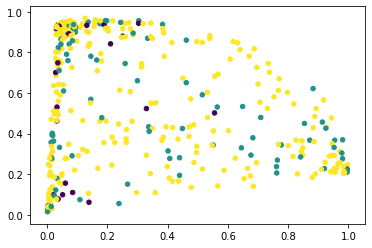

In [18]:

plt.scatter(simil3,simil4, c=y_kmeans, s=20, cmap='viridis')
plt.show

In [ ]:
plt.scatter(simil,simil2, c=y_kmeans, s=20, cmap='viridis')
plt.show

In [22]:
#print(simil[0],neigh[0])
j=0
for i in simil3:
    fl = simil3[j] #(X)
    fu = simil4[j] #(Y)
    #if fu < 0.45 and fl > 0.5:
    if fl > fu+0.3 and fl>0.94:
        print ("X",simil4[j],", Y", simil3[j],", #", neigh[j])
    j+=1


X 0.477 , Y 0.9439 , # 163
X 0.3676 , Y 0.9548 , # 20
X 0.3502 , Y 0.9462 , # 249
X 0.3696 , Y 0.9811 , # 195
X 0.3321 , Y 0.9527 , # 6
X 0.3125 , Y 0.9715 , # 287
X 0.2926 , Y 0.9533 , # 13
X 0.2925 , Y 0.9458 , # 124
X 0.2767 , Y 0.981 , # 217
X 0.3044 , Y 0.9786 , # 208
X 0.2513 , Y 0.9655 , # 156
X 0.2284 , Y 0.9521 , # 199
X 0.2468 , Y 0.9977 , # 176
X 0.2131 , Y 0.9414 , # 242
X 0.2305 , Y 0.9618 , # 223
X 0.2367 , Y 0.987 , # 322
X 0.2577 , Y 0.9718 , # 267
X 0.2248 , Y 0.9959 , # 395
X 0.2358 , Y 0.9837 , # 33
X 0.2216 , Y 0.9964 , # 1
X 0.2082 , Y 0.9555 , # 21
X 0.204 , Y 0.9838 , # 245
X 0.2134 , Y 0.9909 , # 39
X 0.2106 , Y 0.9961 , # 24
X 0.2087 , Y 0.9848 , # 157
X 0.2081 , Y 0.9875 , # 26


In [ ]:
f = 4096
u = AnnoyIndex(f)
u.load('D:/Users/SCA/test.tree') # super fast, will just mmap the file
print (u.get_nns_by_item(0, 20)) # will find the 1000 nearest neighbors

<function matplotlib.pyplot.show(*args, **kw)>

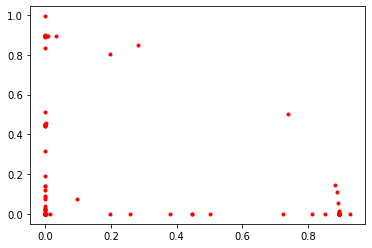

In [42]:
#import matplotlib.pyplot as plt
plt.plot(simil3, simil4,"r.")
#plt.axis([0, 1, 0, 1])

plt.show

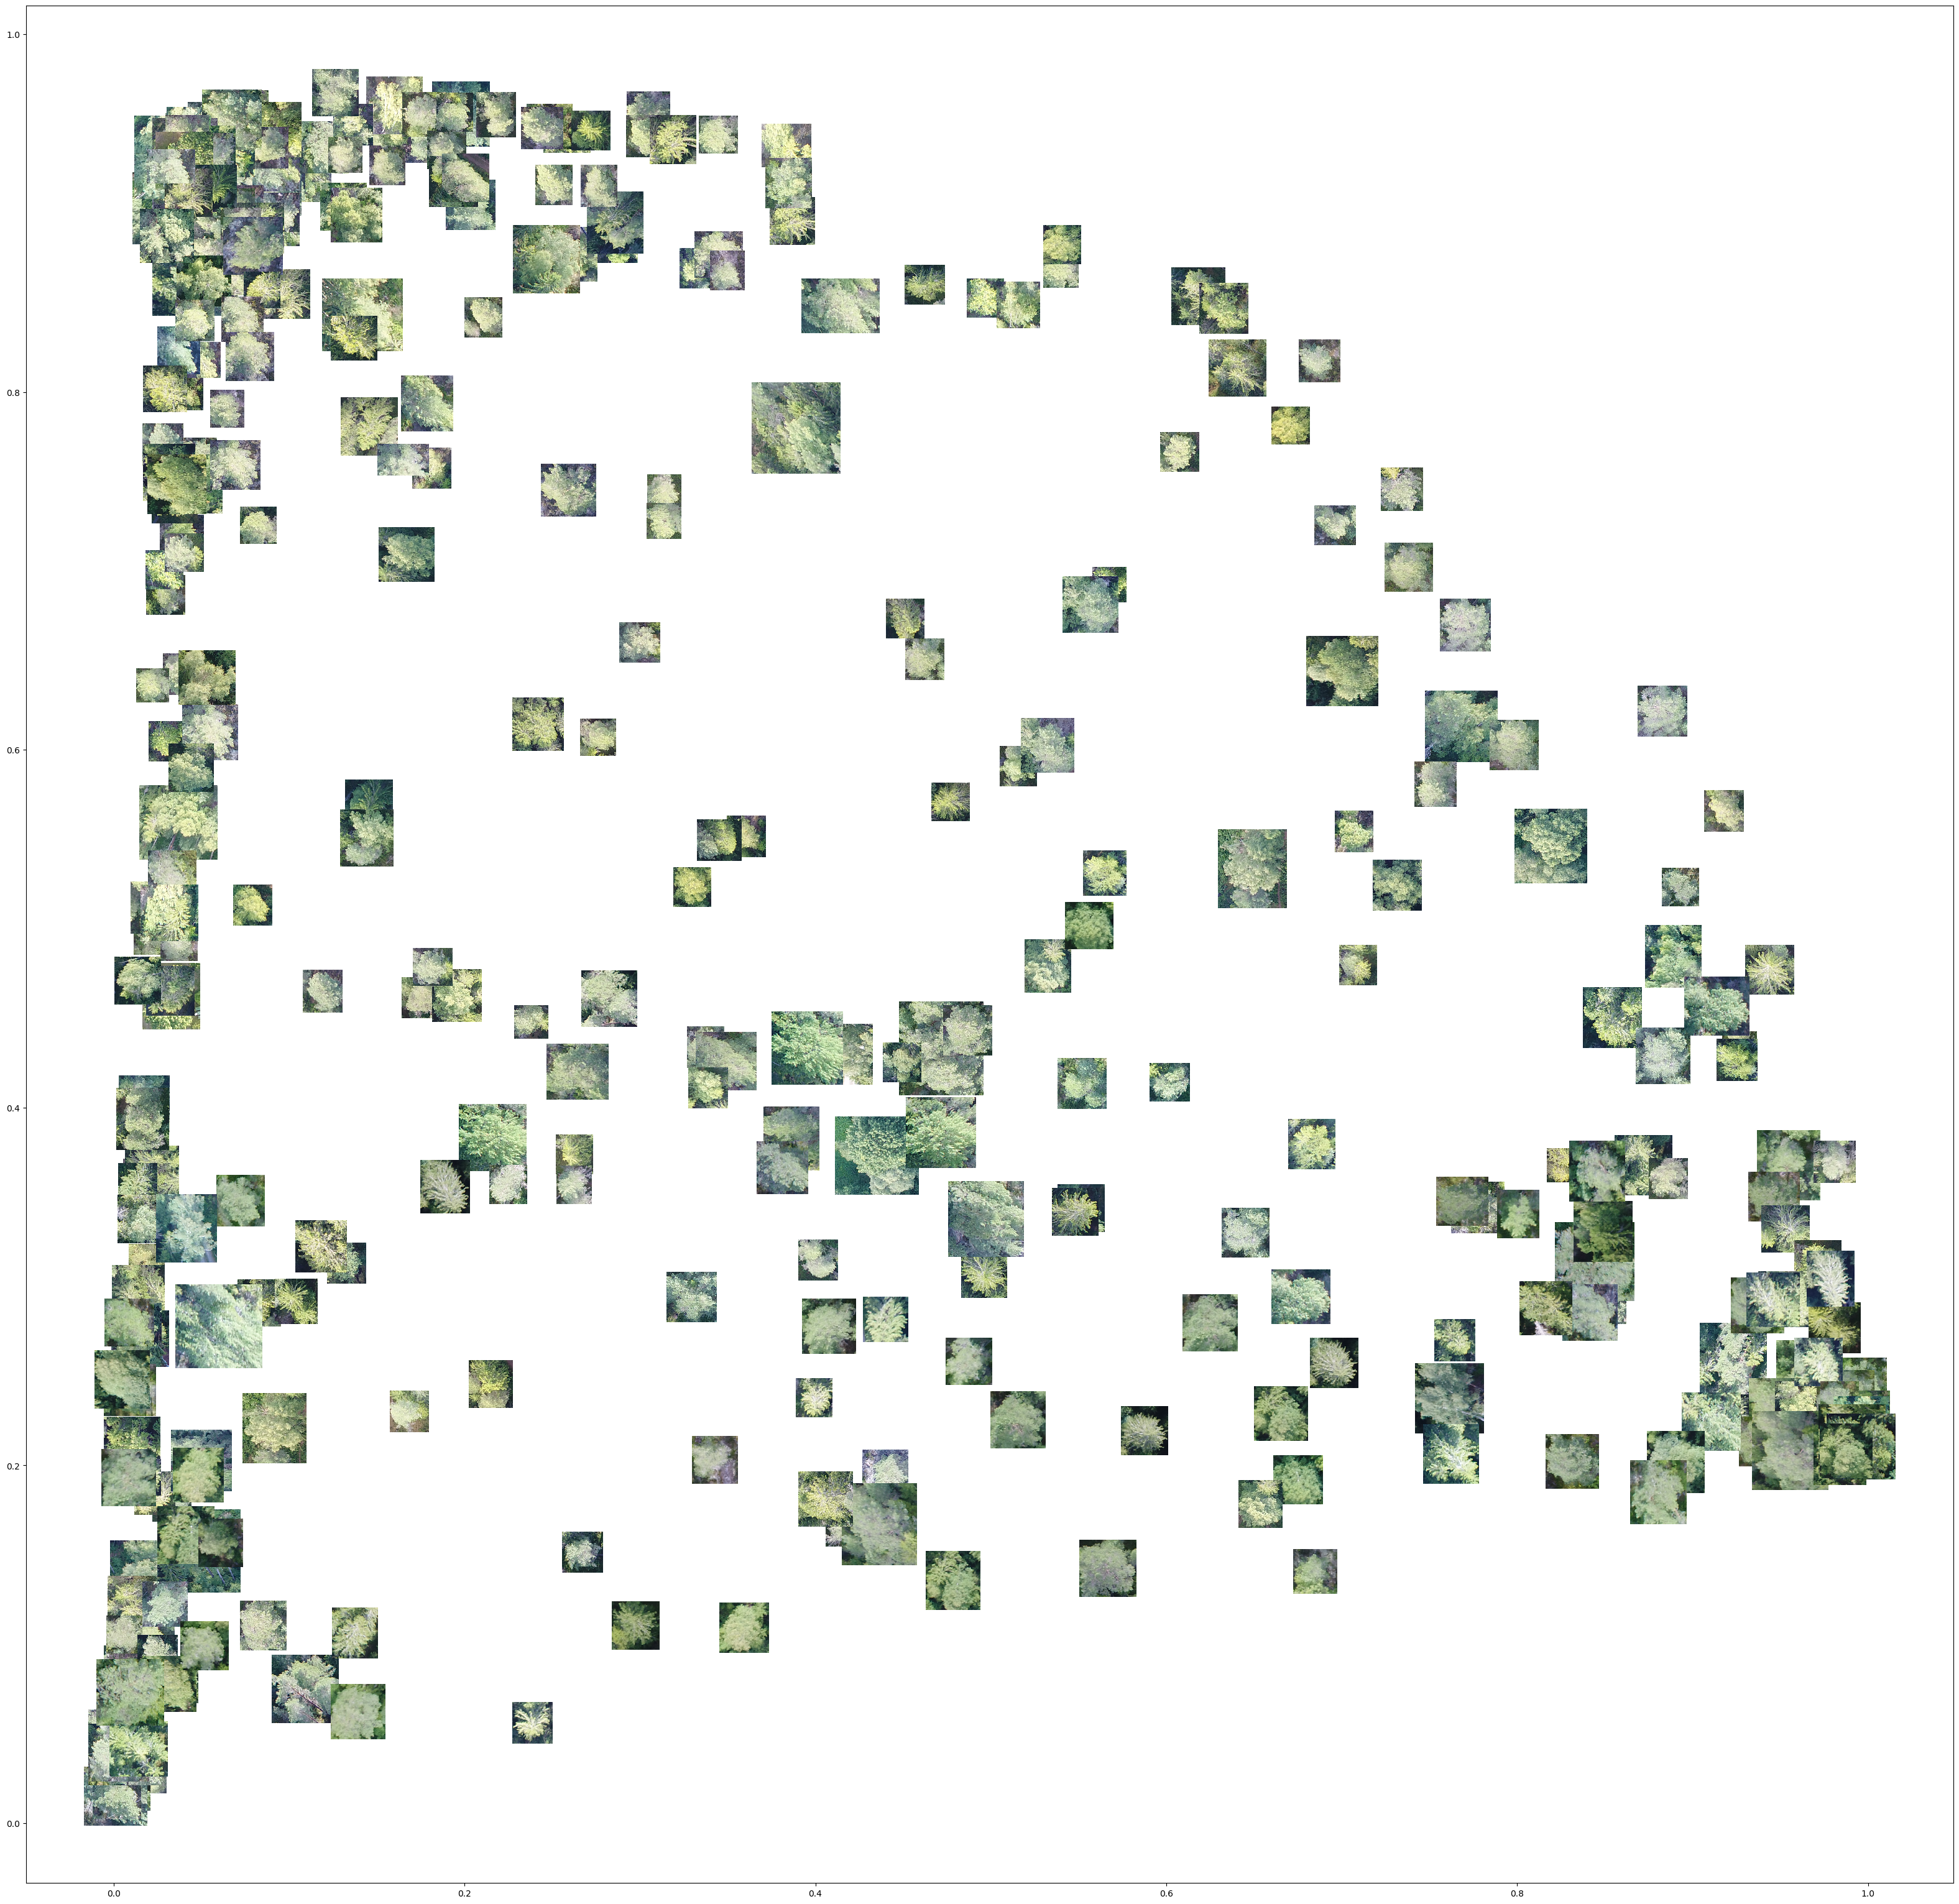

In [19]:
#PLOT IMAGE INSTEAD OF POINT....

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#def getImage(path):
#    return OffsetImage(plt.imread(path))

#paths = [
#    'a.jpg',
#    'b.jpg',
#    'c.jpg',
#    'd.jpg',
#    'e.jpg']
_images = []
smil3 = simil3
smil4 = simil4
#x = [0,1,2,3,4]
#y = [0,1,2,3,4]

fig, ax = plt.subplots(figsize=(40,40), dpi=100)
ax.scatter(smil3, smil4) 

for filename in os.listdir(folder):
    _im = OffsetImage(plt.imread(os.path.join(folder,filename)),zoom=0.3)
    _images.append(_im)

for smil3, smil4, _images in zip(smil3, smil4,_images):
    ab = AnnotationBbox(_images, (smil3, smil4), frameon=False)
    ax.add_artist(ab)